In [ ]:
!pip install numpy pandas matplotlib scikit-learn tensorflow


In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Cattle Project (Yohan)/Models/monthly-milk-production-pounds.csv'  # Replace with your file path
df = pd.read_csv(file_path)

df.head()


,Month,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [2]:
df.tail()

,Month,Production
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797
167,1975-12,843


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


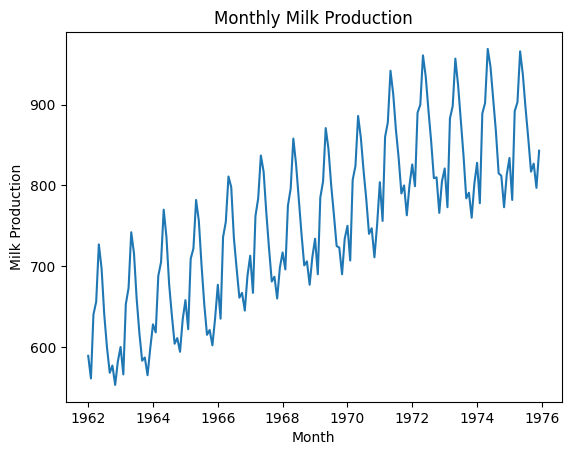

In [4]:
import matplotlib.pyplot as plt

df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Visualize the dataset
plt.plot(df)
plt.title('Monthly Milk Production')
plt.xlabel('Month')
plt.ylabel('Milk Production')
plt.show()

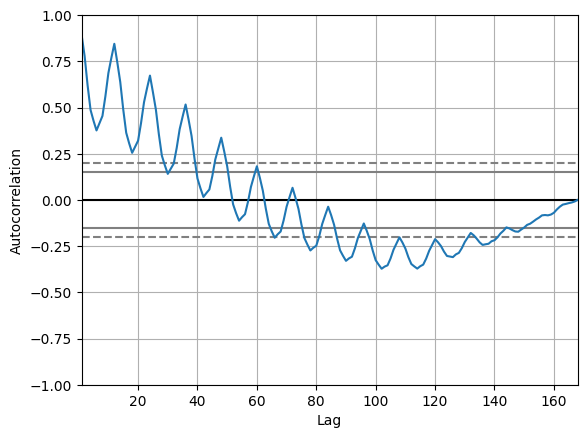

In [5]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
plt.show()

In [6]:
model = ARIMA(df, order=(5,1,0))  # order=(p,d,q), adjust accordingly
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Production   No. Observations:                  168
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -847.049
Date:                Wed, 27 Nov 2024   AIC                           1706.099
Time:                        14:35:35   BIC                           1724.806
Sample:                    01-01-1962   HQIC                          1713.692
                         - 12-01-1975                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0039      0.082      0.047      0.962      -0.157       0.165
ar.L2          0.3814      0.079      4.809      0.000       0.226       0.537
ar.L3         -0.1208      0.100     -1.205      0.2

In [7]:
forecast = model_fit.forecast(steps=12)

# Display the forecasted values
print("Forecast for the next 12 months: \n", forecast)

Forecast for the next 12 months: 
 1976-01-01    848.292142
1976-02-01    863.793392
1976-03-01    874.332949
1976-04-01    857.757890
1976-05-01    858.656331
1976-06-01    844.103770
1976-07-01    841.980335
1976-08-01    844.192951
1976-09-01    844.290819
1976-10-01    852.084749
1976-11-01    852.465690
1976-12-01    854.356847
Freq: MS, Name: predicted_mean, dtype: float64


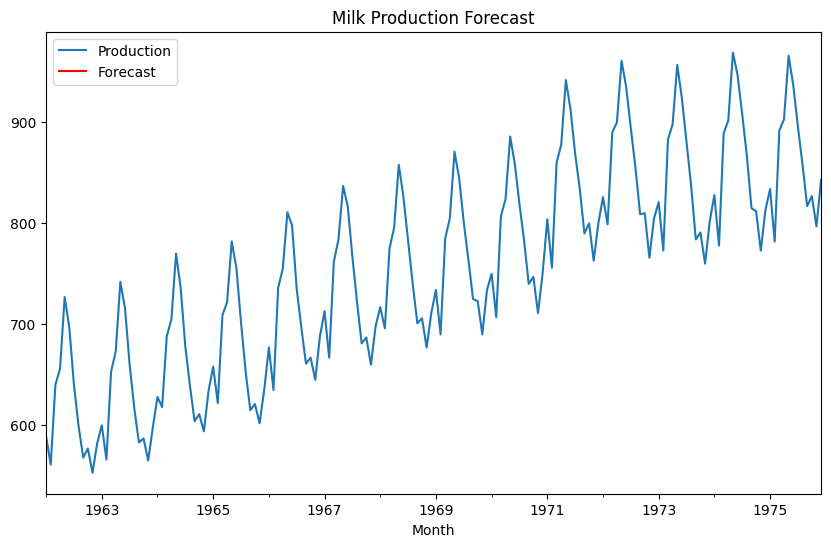

In [8]:
df.plot(label='Original', figsize=(10, 6))
forecast_index = pd.date_range(start=df.index[-1], periods=12, freq='MS')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('Milk Production Forecast')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 10996.088743371962


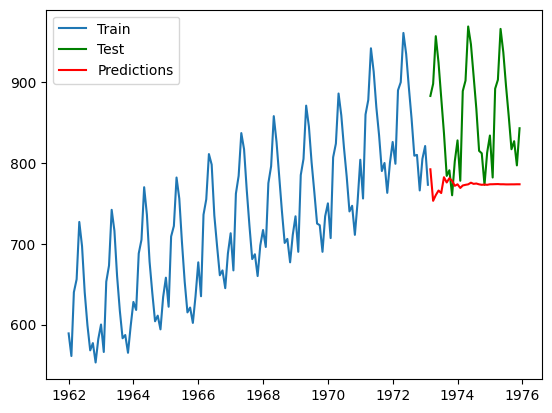

In [9]:
from sklearn.metrics import mean_squared_error

# Evaluate the model with train-test split (optional)
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:]
model_fit = ARIMA(train, order=(5,1,0)).fit()
predictions = model_fit.forecast(steps=len(test))

# Calculate the mean squared error
mse = mean_squared_error(test, predictions)
print('Mean Squared Error:', mse)

# Plot train, test, and predictions
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='green')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.legend()
plt.show()

In [10]:
import joblib
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already fitted the model
model = ARIMA(df, order=(5,1,0))  # Same as before
model_fit = model.fit()

# Export the trained model to a file
joblib.dump(model_fit, 'arima_milk_production_model.pkl')

print("Model has been saved as 'arima_milk_production_model.pkl'")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Model has been saved as 'arima_milk_production_model.pkl'


In [11]:
import joblib
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already fitted the model (data is pre-loaded)
model = ARIMA(df, order=(5,1,0))  # Same as before
model_fit = model.fit()

# Export the trained model to a .joblib file
joblib.dump(model_fit, 'arima_milk_production_model.joblib')

print("Model has been saved as 'arima_milk_production_model.joblib'")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Model has been saved as 'arima_milk_production_model.joblib'


In [12]:
import pandas as pd
import joblib
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# Load the saved ARIMA model
model_path = '/content/arima_milk_production_model.joblib'
loaded_model = joblib.load(model_path)

def predict_milk_production(year, month):
    """
    Predicts milk production for a given year and month.

    Parameters:
    - year: int, the year for which to predict milk production.
    - month: int, the month for which to predict milk production.

    Returns:
    - predicted_value: float, predicted milk production value for the given month.
    """

    # Convert input year and month into a datetime object
    prediction_date = pd.Timestamp(year=year, month=month, day=1)

    # Get the last available date in the model data (assumed to be the last training date)
    last_date = loaded_model.data.dates[-1]

    # Calculate the number of months between the last training date and the requested prediction date
    months_ahead = (prediction_date.year - last_date.year) * 12 + (prediction_date.month - last_date.month)

    # if months_ahead < 0:
    #     raise ValueError("The requested date is within the training data range. Please provide a future date for prediction.")

    # Forecast the milk production for the given number of months ahead
    forecast = loaded_model.forecast(steps=months_ahead if months_ahead > 0 else 1)

    # Return the predicted value for the requested month
    predicted_value = forecast[-1]
    return predicted_value

# Example usage
year = 2011
month = 11
predicted_production = predict_milk_production(year, month)
print(f"Predicted milk production for {year}-{month}: {predicted_production}")


Predicted milk production for 2011-11: 850.3578955312389


<ipython-input-12-12f3929fc2d4>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_value = forecast[-1]
